Dataset: [sleep-health-and-lifestyle-dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

In [715]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# svc
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as pltDecision
import matplotlib.pyplot as plt
import os


# Read Dataset

In [716]:

# columns
# Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder

file_name = "./Sleep_health_and_lifestyle_dataset.csv"
train_columns = ["Gender","Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Stress Level","BMI Category","Blood Pressure","Heart Rate","Daily Steps"]
target_column = "Sleep Disorder"

df = pd.read_csv(file_name)
print(df.columns.tolist())

X = df[train_columns]
y = df[target_column]
df.head(15)


['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


# Data Preprocessing

In [717]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np


data_original = pd.read_csv(file_name)
# Drop 'Person ID' as it is not predictive
data = data_original.drop(columns=['Person ID'])

# Encode categorical columns
label_encoders = {}
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

# Replace None values in 'Sleep Disorder' with "None" string
data['Sleep Disorder'] = data['Sleep Disorder'].fillna("None")

# Split Blood Pressure into two columns: Systolic and Diastolic
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)
data = data.drop(columns=['Blood Pressure'])
data.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
5,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140.0,90.0
6,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140.0,90.0
7,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120.0,80.0
8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120.0,80.0
9,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,120.0,80.0


In [718]:
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le



# Extract features (X) and target (y)
X = data.drop(columns=['Sleep Disorder'])
y = data['Sleep Disorder']

data.head(10)


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,3,77,4200,1,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,1,125.0,80.0
3,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0
4,1,28,6,5.9,4,30,8,2,85,3000,2,140.0,90.0
5,1,28,9,5.9,4,30,8,2,85,3000,0,140.0,90.0
6,1,29,10,6.3,6,40,7,2,82,3500,0,140.0,90.0
7,1,29,1,7.8,7,75,6,0,70,8000,1,120.0,80.0
8,1,29,1,7.8,7,75,6,0,70,8000,1,120.0,80.0
9,1,29,1,7.8,7,75,6,0,70,8000,1,120.0,80.0


In [719]:

# Normalize/scale numerical features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

# Create a DataFrame for the scaled features and the target variable
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df['Sleep Disorder'] = y.values
print(scaled_df.describe())

scaled_df.head(10)

(299, 12) (75, 12)
           Gender           Age    Occupation  Sleep Duration  \
count  374.000000  3.740000e+02  3.740000e+02    3.740000e+02   
mean     0.000000 -4.559633e-16 -1.139908e-16    1.348891e-15   
std      1.001340  1.001340e+00  1.001340e+00    1.001340e+00   
min     -1.010753 -1.753096e+00 -1.236152e+00   -1.676439e+00   
25%     -1.010753 -8.006081e-01 -9.084975e-01   -9.213348e-01   
50%      0.989361  9.415288e-02 -2.531878e-01    8.547080e-02   
75%      0.989361  9.023241e-01  4.021218e-01    8.405750e-01   
max      0.989361  1.941401e+00  2.040396e+00    1.721530e+00   

       Quality of Sleep  Physical Activity Level  Stress Level  BMI Category  \
count      3.740000e+02             3.740000e+02  3.740000e+02  3.740000e+02   
mean       2.469801e-16            -3.324732e-17  1.994839e-16 -3.799694e-17   
std        1.001340e+00             1.001340e+00  1.001340e+00  1.001340e+00   
min       -2.771424e+00            -1.402260e+00 -1.345836e+00 -9.072841e-0

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic BP,Diastolic BP,Sleep Disorder
0,0.989361,-1.753096,1.712741,-1.298887,-1.098280,-0.825418,0.347021,1.191629,1.654719,-1.619584,-0.330002,-0.268102,1
1,0.989361,-1.637643,-0.908497,-1.173036,-1.098280,0.039844,1.475592,-0.907284,1.170474,1.970077,-0.459239,-0.755640,1
2,0.989361,-1.637643,-0.908497,-1.173036,-1.098280,0.039844,1.475592,-0.907284,1.170474,1.970077,-0.459239,-0.755640,1
3,0.989361,-1.637643,0.729777,-1.550588,-2.771424,-1.402260,1.475592,0.491991,3.591698,-2.362273,1.479309,0.869486,2
4,0.989361,-1.637643,0.729777,-1.550588,-2.771424,-1.402260,1.475592,0.491991,3.591698,-2.362273,1.479309,0.869486,2
5,0.989361,-1.637643,1.712741,-1.550588,-2.771424,-1.402260,1.475592,0.491991,3.591698,-2.362273,1.479309,0.869486,0
6,0.989361,-1.522190,2.040396,-1.047186,-1.098280,-0.921559,0.911306,0.491991,2.865331,-2.052819,1.479309,0.869486,0
7,0.989361,-1.522190,-0.908497,0.840575,-0.261708,0.760896,0.347021,-0.907284,-0.040138,0.732263,-1.105421,-0.755640,1
8,0.989361,-1.522190,-0.908497,0.840575,-0.261708,0.760896,0.347021,-0.907284,-0.040138,0.732263,-1.105421,-0.755640,1
9,0.989361,-1.522190,-0.908497,0.840575,-0.261708,0.760896,0.347021,-0.907284,-0.040138,0.732263,-1.105421,-0.755640,1


In [720]:

print("Sleep Disorder:", end='\n\n')

print(data_original["Sleep Disorder"].head(), end='\n\n')
print(data["Sleep Disorder"].head(), end='\n\n')

print("Occupation:", end='\n\n')
print(data_original["Occupation"].head(), end='\n\n')
print(data["Occupation"].head(), end='\n\n')


Sleep Disorder:

0            NaN
1            NaN
2            NaN
3    Sleep Apnea
4    Sleep Apnea
Name: Sleep Disorder, dtype: object

0    1
1    1
2    1
3    2
4    2
Name: Sleep Disorder, dtype: int64

Occupation:

0       Software Engineer
1                  Doctor
2                  Doctor
3    Sales Representative
4    Sales Representative
Name: Occupation, dtype: object

0    9
1    1
2    1
3    6
4    6
Name: Occupation, dtype: int64



# Correlation 

Correlation Matrix (Sleep Disorder):
Physical Activity Level    0.433214
Daily Steps                0.342098
Diastolic BP               0.310051
Systolic BP                0.241786
Age                        0.232000
Heart Rate                 0.205987
Quality of Sleep           0.179592
Sleep Duration             0.177552
BMI Category               0.016573
Stress Level              -0.036058
Occupation                -0.169800
Gender                    -0.253415
Name: Sleep Disorder, dtype: float64


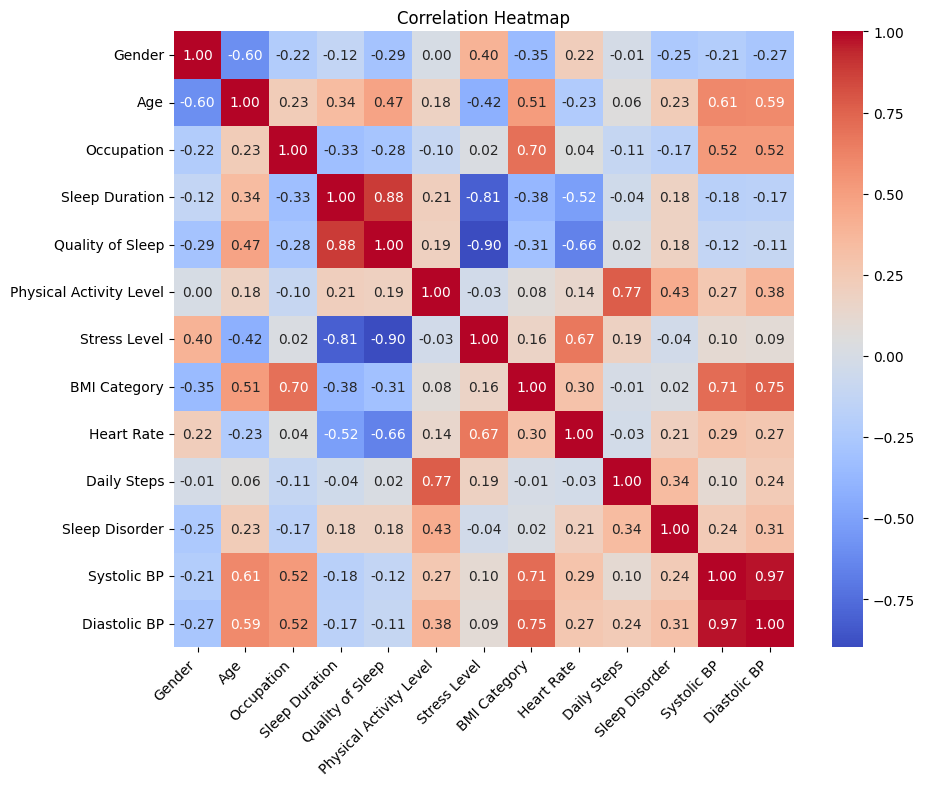

In [721]:
# Correlation  matrix
import seaborn as sns

# Calculate correlation matrix


correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix (Sleep Disorder):")
# print(correlation_matrix.head())

sleep_disorder_correlation = correlation_matrix["Sleep Disorder"].drop("Sleep Disorder")
sorted_sleep_disorder_correlation = sleep_disorder_correlation.sort_values(ascending=False)
print(sorted_sleep_disorder_correlation)


# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.show()

# Chi2 Test 

In [722]:
# Chi-squared test
from sklearn.feature_selection import chi2

# Perform Chi-Squared Test for each categorical feature with respect to 'Sleep Disorder'

# Correctly select categorical features from the DataFrame
X_cats = data[['Gender', 'Occupation', 'BMI Category']]

# Ensure that the target variable is properly defined
y = data['Sleep Disorder']

# Perform the Chi-Squared test
chi2_values, p_values = chi2(X_cats, y)

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({
    'Feature': X_cats.columns,
    'Chi2 Value': chi2_values,
    'P-Value': p_values
})

# Display the Chi-Squared test results
print(chi2_results)

# Filter for significant features (p-value < 0.05)
significant_features = chi2_results[chi2_results['P-Value'] < 0.05]
print("\nSignificant Features based on Chi-Squared Test:")
significant_features



        Feature  Chi2 Value       P-Value
0        Gender   26.862604  1.468452e-06
1    Occupation  338.329511  3.409418e-74
2  BMI Category  374.767752  4.170774e-82

Significant Features based on Chi-Squared Test:


,Feature,Chi2 Value,P-Value
0,Gender,26.862604,1.468452e-06
1,Occupation,338.329511,3.409418e-74
2,BMI Category,374.767752,4.170774e-82


        Feature  Chi2 Value       P-Value
0        Gender   26.862604  1.468452e-06
1    Occupation  338.329511  3.409418e-74
2  BMI Category  374.767752  4.170774e-82


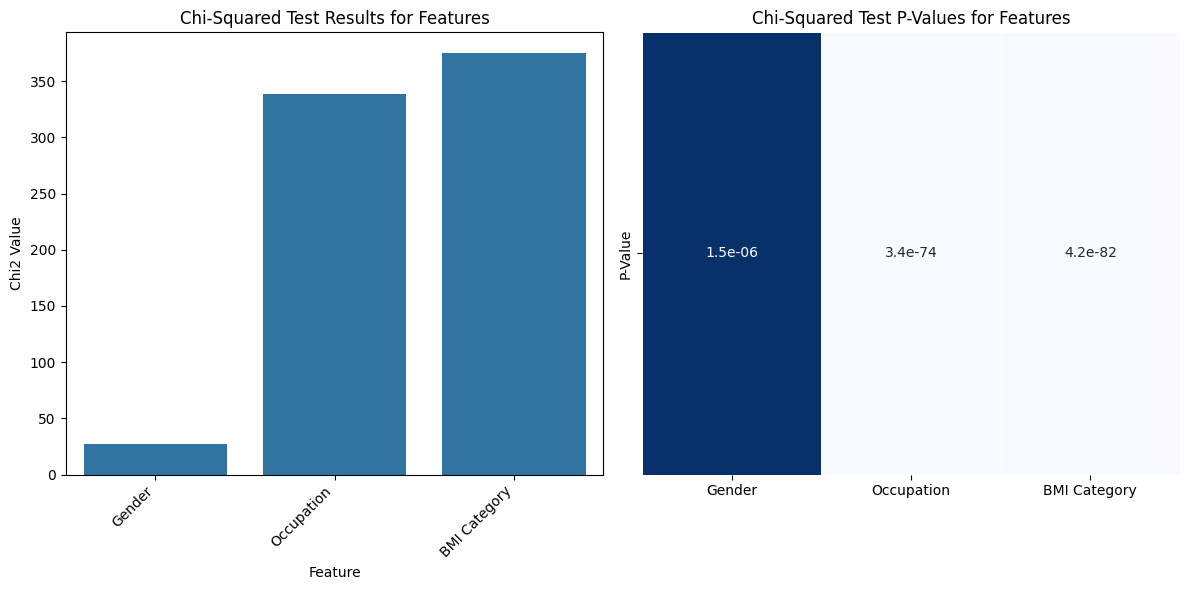

In [723]:
plt.figure(figsize=(12, 6))

print(chi2_results)
# Plotting Chi-Squared Values
plt.subplot(1, 2, 1)
sns.barplot(x='Feature', y='Chi2 Value', data=chi2_results.sort_values(by='Chi2 Value', ascending=True))
plt.title('Chi-Squared Test Results for Features')
plt.xticks(rotation=45, ha='right')

# Plotting p-values as a heatmap
plt.subplot(1, 2, 2)
sns.heatmap(chi2_results[['P-Value']].T, xticklabels=chi2_results['Feature'], annot=True, cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Chi-Squared Test P-Values for Features')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



Significant Features based on ANOVA:
                    Feature     F-Value       P-Value
6              Stress Level    6.603565  1.520459e-03
9               Daily Steps   24.776923  7.942397e-11
4          Quality of Sleep   27.600604  6.688642e-12
0                    Gender   31.510655  2.293822e-13
3            Sleep Duration   31.913468  1.626151e-13
8                Heart Rate   32.948639  6.737408e-14
5   Physical Activity Level   44.150579  6.306184e-18
1                       Age   58.408963  8.852105e-23
2                Occupation  107.271989  1.724128e-37
10              Systolic BP  214.585414  1.198027e-62
11             Diastolic BP  268.097906  9.232470e-73
7              BMI Category  324.217841  3.699233e-82


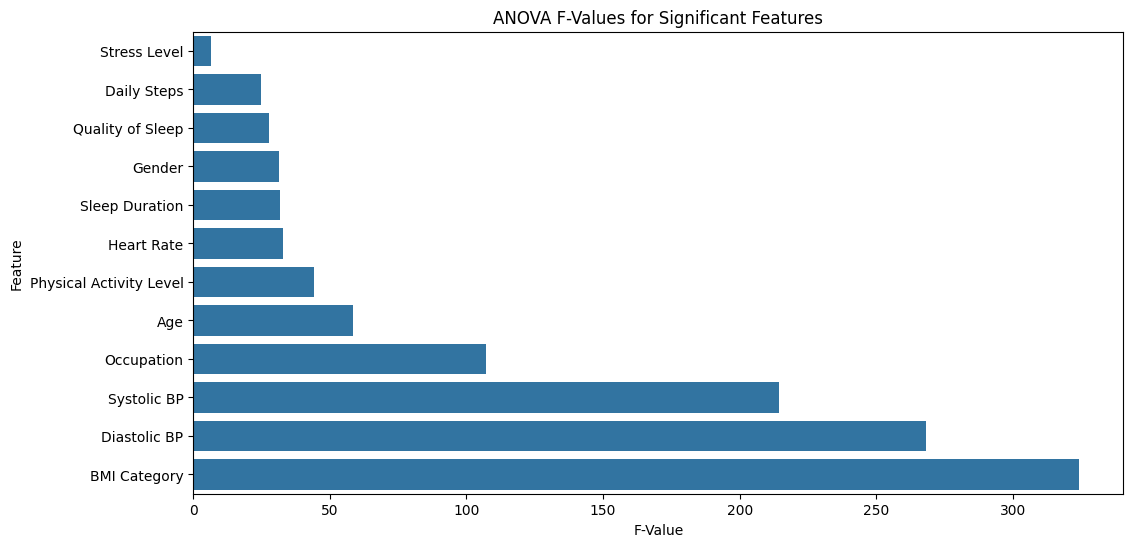

In [724]:
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Apply ANOVA F-test
f_values, p_values = f_classif(X_scaled, y)

# Create a DataFrame to store the results
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
})

# Display the ANOVA results
# print(anova_results)

# You can use a threshold to select features based on p-value (e.g., p-value < 0.05 indicates significance)
significant_features = anova_results[anova_results['P-Value'] < 0.05]
print("\nSignificant Features based on ANOVA:")

# Sort significant features by F-Value in ascending order
significant_features = significant_features.sort_values(by="F-Value", ascending=True)
print(significant_features)

# Plotting F-Values
plt.figure(figsize=(12, 6))
sns.barplot(x='F-Value', y='Feature', data=significant_features)
plt.title('ANOVA F-Values for Significant Features')
plt.xlabel('F-Value')
plt.ylabel('Feature')
plt.show()

# SVM v.s Decision Tree v.s XGBoost

In [725]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

xgb_accuracy, svm_accuracy

/home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:50:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.96, 0.9733333333333334)

In [726]:


# Modify XGBoost parameters to speed up training
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, n_estimators=50, max_depth=5)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Re-check SVM training and prediction
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# SVM RBF
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_rbf_accuracy = accuracy_score(y_test, svm_predictions)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)


print(f'svm_accuracy: {svm_accuracy}')
print(f'svm_rbf_accuracy: {svm_rbf_accuracy}')
print(f'dt_accuracy: {dt_accuracy}')
print(f'xgb_accuracy: {xgb_accuracy}')


svm_accuracy: 0.9733333333333334
svm_rbf_accuracy: 0.9733333333333334
dt_accuracy: 0.9466666666666667
xgb_accuracy: 0.96


# Polynomial + PCA

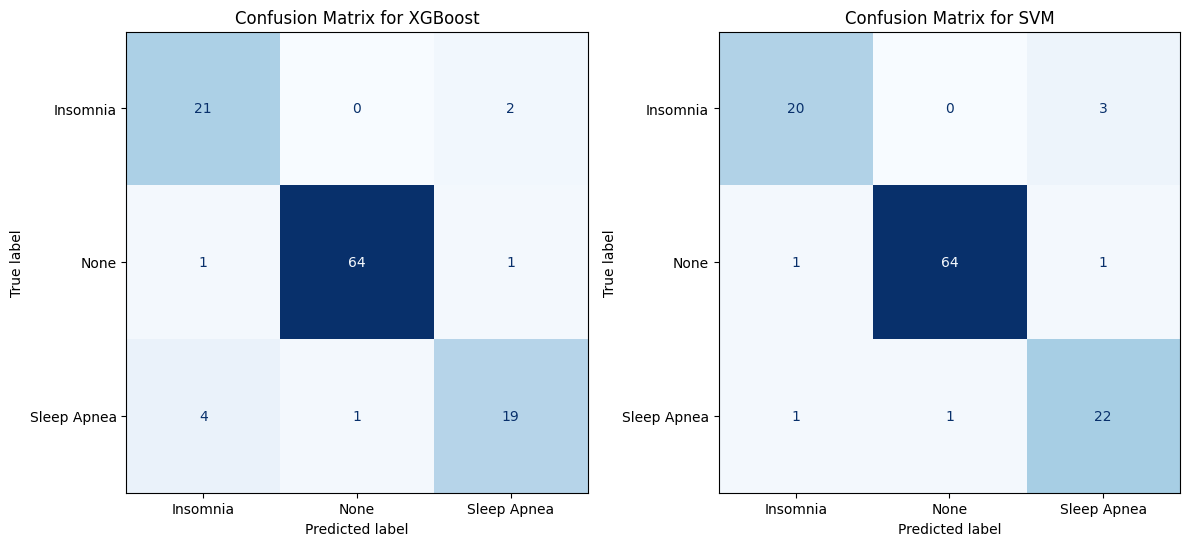

(0.9203539823008849, 0.9380530973451328)

In [727]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# Add interaction terms (Feature Engineering)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Perform PCA for feature reduction (optional step to handle high-dimensional data)
pca = PCA(n_components=2)  # Retain original number of features for now
X_pca = pca.fit_transform(X_poly)
# X_pca = pca.fit_transform(X)

# Re-split the enhanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train XGBoost with enhanced features
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Train SVM with enhanced features
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, model_name, predictions in zip(
    axes,
    ["XGBoost", "SVM"],
    [xgb_predictions, svm_predictions]
):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Sleep Disorder'].classes_)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

xgb_accuracy, svm_accuracy

[(1, 1, 0.9333333333333333, 0.8266666666666667), (2, 1, 0.92, 0.8266666666666667), (3, 1, 0.96, 0.8266666666666667), (4, 1, 0.9466666666666667, 0.8266666666666667), (5, 1, 0.92, 0.8266666666666667), (6, 1, 0.9333333333333333, 0.8266666666666667), (7, 1, 0.96, 0.8266666666666667), (8, 1, 0.9333333333333333, 0.8266666666666667), (9, 1, 0.92, 0.8266666666666667), (10, 1, 0.92, 0.8266666666666667), (1, 2, 0.8933333333333333, 0.7866666666666666), (2, 2, 0.92, 0.76), (3, 2, 0.9066666666666666, 0.88), (4, 2, 0.92, 0.88), (5, 2, 0.92, 0.88), (6, 2, 0.9466666666666667, 0.88), (7, 2, 0.9466666666666667, 0.88), (8, 2, 0.9466666666666667, 0.88), (9, 2, 0.9466666666666667, 0.88), (10, 2, 0.9466666666666667, 0.88), (1, 3, 0.8933333333333333, 0.6533333333333333), (2, 3, 0.9066666666666666, 0.8533333333333334), (3, 3, 0.92, 0.8533333333333334), (4, 3, 0.92, 0.84), (5, 3, 0.92, 0.8533333333333334), (6, 3, 0.92, 0.8533333333333334), (7, 3, 0.92, 0.8533333333333334), (8, 3, 0.92, 0.8533333333333334), (9,

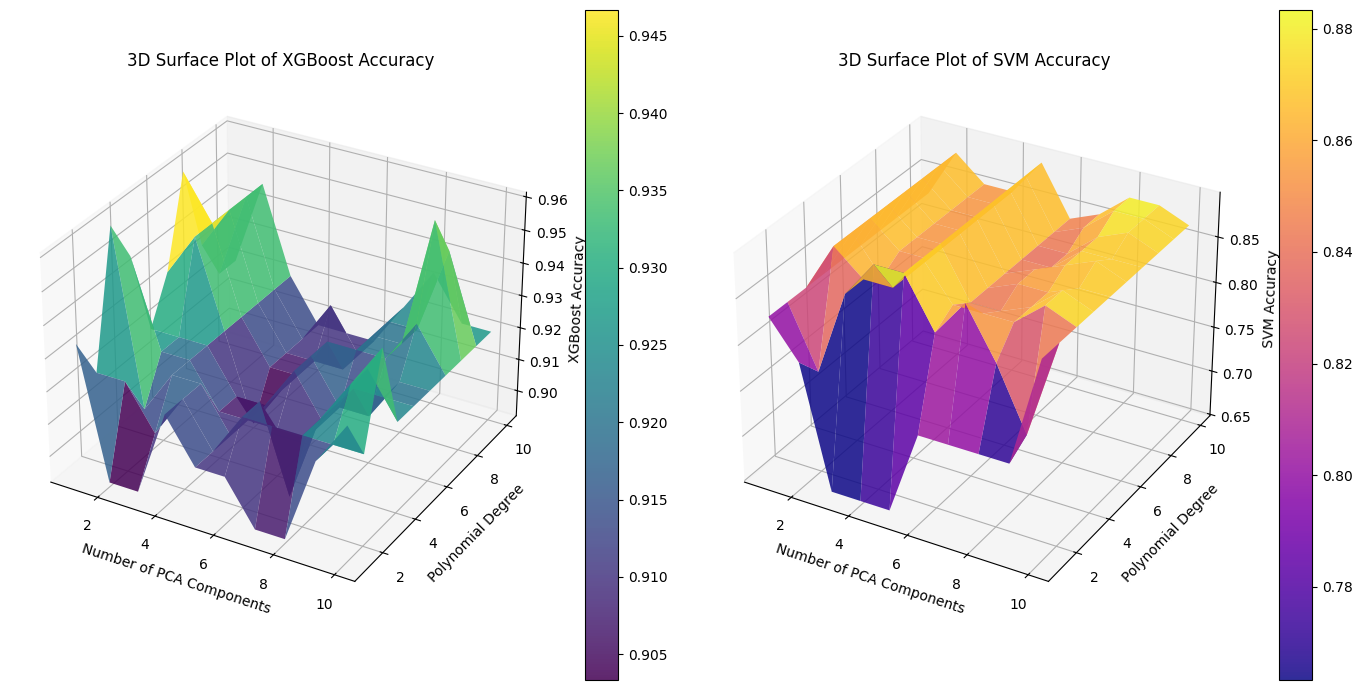

In [728]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Initialize variables to track the best accuracy and parameters
results = []  # To store accuracy and parameters

# Loop through different degrees for PolynomialFeatures
max_deg = 10
max_components = 10
for degree in range(1, max_deg+1):  
    poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Loop through different components for PCA
    for n_components in range(1, min(X_poly.shape[1], max_components+1)):  
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X_poly)

        # Re-split the enhanced dataset
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

        # Train XGBoost with enhanced features
        xgb_model.fit(X_train, y_train)
        xgb_predictions = xgb_model.predict(X_test)
        xgb_accuracy = accuracy_score(y_test, xgb_predictions)

        # Train SVM with enhanced features
        svm_model.fit(X_train, y_train)
        svm_predictions = svm_model.predict(X_test)
        svm_accuracy = accuracy_score(y_test, svm_predictions)

        # Store results for both models
        results.append((n_components, degree, xgb_accuracy, svm_accuracy))

print(results)

# Print the best accuracies and their corresponding parameters
best_xgb_accuracy = max(results, key=lambda x: x[2])
best_svm_accuracy = max(results, key=lambda x: x[3])
print(f'Best XGBoost Accuracy: {best_xgb_accuracy[2]} with Polynomial Degree: {best_xgb_accuracy[1]} and PCA Components: {best_xgb_accuracy[0]}')
print(f'Best SVM Accuracy: {best_svm_accuracy[3]} with Polynomial Degree: {best_svm_accuracy[1]} and PCA Components: {best_svm_accuracy[0]}')

# 3D Plot for accuracy comparison
fig = plt.figure(figsize=(14, 7))
n_components, degrees, xgb_acc, svm_acc = zip(*results)

# First subplot: Scatter plot for XGBoost
# ax1 = fig.add_subplot(121, projection='3d')

# Unzip results for plotting

# Second subplot: 3D surface plot for XGBoost
ax2 = fig.add_subplot(121, projection='3d')

# Create a grid for surface plot
X_grid, Y_grid = np.meshgrid(np.unique(n_components), np.unique(degrees))
Z_grid = np.zeros_like(X_grid, dtype=float)

# Fill the Z values with the corresponding accuracies for XGBoost
for i in range(len(results)):
    n_comp, deg, xgb_acc, svm_acc = results[i]
    Z_grid[np.where(np.unique(n_components) == n_comp)[0][0], np.where(np.unique(degrees) == deg)[0][0]] = xgb_acc

# Plot the surface for XGBoost
surf_xgb = ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.85)

ax2.set_xlabel('Number of PCA Components')
ax2.set_ylabel('Polynomial Degree')
ax2.set_zlabel('XGBoost Accuracy')
ax2.set_title('3D Surface Plot of XGBoost Accuracy')
fig.colorbar(surf_xgb)

# Fourth subplot: 3D surface plot for SVM
ax4 = fig.add_subplot(122, projection='3d')

# Create a grid for surface plot for SVM
Z_grid_svm = np.zeros_like(X_grid, dtype=float)

# Fill the Z values with the corresponding accuracies for SVM
for i in range(len(results)):
    n_comp, deg, xgb_acc, svm_acc = results[i]
    Z_grid_svm[np.where(np.unique(n_components) == n_comp)[0][0], np.where(np.unique(degrees) == deg)[0][0]] = svm_acc

# Plot the surface for SVM
surf_svm = ax4.plot_surface(X_grid, Y_grid, Z_grid_svm, cmap='plasma', alpha=0.85)

ax4.set_xlabel('Number of PCA Components')
ax4.set_ylabel('Polynomial Degree')
ax4.set_zlabel('SVM Accuracy')
ax4.set_title('3D Surface Plot of SVM Accuracy')
fig.colorbar(surf_svm)

plt.tight_layout()
plt.show()

[(1, 1, 0.84), (1, 2, 0.9066666666666666), (1, 3, 0.9333333333333333), (1, 4, 0.9333333333333333), (1, 5, 0.96), (1, 6, 0.96), (1, 7, 0.96), (1, 8, 0.96), (1, 9, 0.96), (1, 10, 0.96), (1, 11, 0.96), (1, 12, 0.96), (1, 13, 0.96), (1, 14, 0.96), (1, 15, 0.96), (1, 16, 0.96), (1, 17, 0.96), (1, 18, 0.96), (1, 19, 0.96), (1, 20, 0.96), (2, 1, 0.9066666666666666), (2, 2, 0.9066666666666666), (2, 3, 0.9333333333333333), (2, 4, 0.9333333333333333), (2, 5, 0.96), (2, 6, 0.96), (2, 7, 0.96), (2, 8, 0.96), (2, 9, 0.96), (2, 10, 0.96), (2, 11, 0.96), (2, 12, 0.96), (2, 13, 0.96), (2, 14, 0.96), (2, 15, 0.96), (2, 16, 0.96), (2, 17, 0.96), (2, 18, 0.96), (2, 19, 0.96), (2, 20, 0.96), (3, 1, 0.9066666666666666), (3, 2, 0.9066666666666666), (3, 3, 0.9333333333333333), (3, 4, 0.9333333333333333), (3, 5, 0.96), (3, 6, 0.96), (3, 7, 0.96), (3, 8, 0.96), (3, 9, 0.96), (3, 10, 0.96), (3, 11, 0.96), (3, 12, 0.96), (3, 13, 0.96), (3, 14, 0.96), (3, 15, 0.96), (3, 16, 0.96), (3, 17, 0.96), (3, 18, 0.96), (3

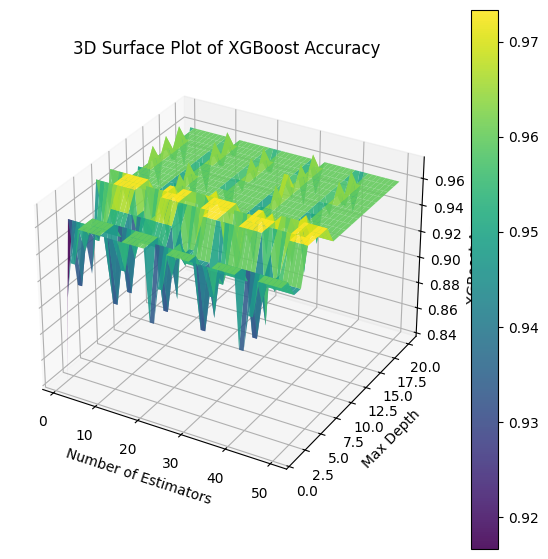

In [729]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Feature Engineering: Add interaction terms

poly = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_poly)

# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Initialize parameters for XGBoost
n_estimators_list = range(1, 51, 1)  # Example values for n_estimators
max_depth_list = range(1, 21,1)  # Example values for max_depth
results = []

# Loop through n_estimators and max_depth
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, 
                                   n_estimators=n_estimators, max_depth=max_depth)
        xgb_model.fit(X_train, y_train)
        xgb_predictions = xgb_model.predict(X_test)
        xgb_accuracy = accuracy_score(y_test, xgb_predictions)
        results.append((n_estimators, max_depth, xgb_accuracy))

# Find the highest accuracy and corresponding parameters
print(results)
highest_accuracy = max(results, key=lambda x: x[2])[2]
highest_results = [result for result in results if result[2] == highest_accuracy]

# List all highest results and their parameters
for n_estimators, max_depth, accuracy in highest_results:
    print(f"Highest Accuracy: {accuracy:.4f} with n_estimators: {n_estimators} and max_depth: {max_depth}")

# Prepare data for 3D surface plot
n_estimators_values = [result[0] for result in results]
max_depth_values = [result[1] for result in results]
accuracy_values = [result[2] for result in results]

# Create a grid for surface plot
X_grid, Y_grid = np.meshgrid(np.unique(n_estimators_values), np.unique(max_depth_values))
Z_grid = np.array(accuracy_values).reshape(len(np.unique(max_depth_values)), len(np.unique(n_estimators_values)))

# Plot the surface for XGBoost
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
surf_xgb = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.9)

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Max Depth')
ax.set_zlabel('XGBoost Accuracy')
ax.set_title('3D Surface Plot of XGBoost Accuracy')
fig.colorbar(surf_xgb)

plt.show()

[(1e-10, 1e-10, 0.5866666666666667), (1e-10, 1e-09, 0.5866666666666667), (1e-10, 1e-08, 0.5866666666666667), (1e-10, 1e-07, 0.5866666666666667), (1e-10, 1e-06, 0.5866666666666667), (1e-10, 1e-05, 0.5866666666666667), (1e-10, 0.0001, 0.5866666666666667), (1e-10, 0.001, 0.5866666666666667), (1e-10, 0.01, 0.5866666666666667), (1e-10, 0.1, 0.5866666666666667), (1e-10, 1, 0.5866666666666667), (1e-10, 10, 0.5866666666666667), (1e-10, 100, 0.5866666666666667), (1e-10, 1000, 0.5866666666666667), (1e-10, 10000, 0.5866666666666667), (1e-10, 100000, 0.5866666666666667), (1e-10, 1000000, 0.5866666666666667), (1e-10, 10000000, 0.5866666666666667), (1e-10, 100000000, 0.5866666666666667), (1e-10, 1000000000, 0.5866666666666667), (1e-09, 1e-10, 0.5866666666666667), (1e-09, 1e-09, 0.5866666666666667), (1e-09, 1e-08, 0.5866666666666667), (1e-09, 1e-07, 0.5866666666666667), (1e-09, 1e-06, 0.5866666666666667), (1e-09, 1e-05, 0.5866666666666667), (1e-09, 0.0001, 0.5866666666666667), (1e-09, 0.001, 0.586666

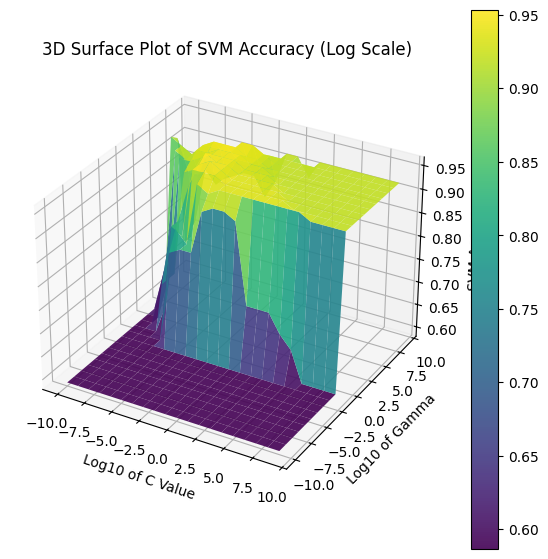

In [730]:

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

# Feature Engineering: Add interaction terms
poly = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_poly)

# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Initialize parameters for SVM
C_list = [10**i for i in range(-10, 10, 1)]  # Example values for C
gamma_list = [10**i for i in range(-10, 10, 1)]  # Example values for gamma
results = []

# Loop through C and gamma
for C in C_list:
    for gamma in gamma_list:
        svm_model = SVC(C=C, gamma=gamma, random_state=42)
        svm_model.fit(X_train, y_train)
        svm_predictions = svm_model.predict(X_test)
        svm_accuracy = accuracy_score(y_test, svm_predictions)
        results.append((C, gamma, svm_accuracy))

# Find the highest accuracy and corresponding parameters
print(results)
highest_accuracy = max(results, key=lambda x: x[2])[2]
highest_results = [result for result in results if result[2] == highest_accuracy]

# List all highest results and their parameters
for C, gamma, accuracy in highest_results:
    print(f"Highest Accuracy: {accuracy:.4f} with C: {C} and gamma: {gamma}")

# Prepare data for 3D surface plot
C_values = [result[0] for result in results]
gamma_values = [result[1] for result in results]
accuracy_values = [result[2] for result in results]

# Create a grid for surface plot
X_grid, Y_grid = np.meshgrid(np.unique(C_values), np.unique(gamma_values))
Z_grid = np.array(accuracy_values).reshape(len(np.unique(gamma_values)), len(np.unique(C_values)))

# Plot the surface for SVM using logarithmic scale
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
surf_svm = ax.plot_surface(np.log10(X_grid), np.log10(Y_grid), Z_grid, cmap='viridis', alpha=0.9)

ax.set_xlabel('Log10 of C Value')
ax.set_ylabel('Log10 of Gamma')
ax.set_zlabel('SVM Accuracy')
ax.set_title('3D Surface Plot of SVM Accuracy (Log Scale)')
fig.colorbar(surf_svm)

plt.show()

# Without Feature Enginneering

[(1, 1, 0.88), (1, 2, 0.9466666666666667), (1, 3, 0.9733333333333334), (1, 4, 0.9866666666666667), (1, 5, 0.9866666666666667), (1, 6, 0.9866666666666667), (1, 7, 0.9866666666666667), (1, 8, 0.9866666666666667), (1, 9, 0.9866666666666667), (1, 10, 0.9866666666666667), (1, 11, 0.9866666666666667), (1, 12, 0.9866666666666667), (1, 13, 0.9866666666666667), (1, 14, 0.9866666666666667), (1, 15, 0.9866666666666667), (1, 16, 0.9866666666666667), (1, 17, 0.9866666666666667), (1, 18, 0.9866666666666667), (1, 19, 0.9866666666666667), (1, 20, 0.9866666666666667), (2, 1, 0.8933333333333333), (2, 2, 0.96), (2, 3, 0.9733333333333334), (2, 4, 0.9866666666666667), (2, 5, 0.9866666666666667), (2, 6, 0.9866666666666667), (2, 7, 0.9866666666666667), (2, 8, 0.9866666666666667), (2, 9, 0.9866666666666667), (2, 10, 0.9866666666666667), (2, 11, 0.9866666666666667), (2, 12, 0.9866666666666667), (2, 13, 0.9866666666666667), (2, 14, 0.9866666666666667), (2, 15, 0.9866666666666667), (2, 16, 0.9866666666666667), (

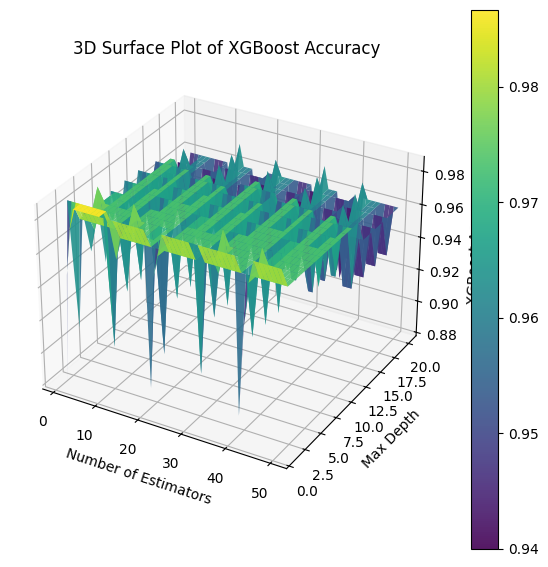

In [731]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Feature Engineering: Add interaction terms


# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize parameters for XGBoost
n_estimators_list = range(1, 51, 1)  # Example values for n_estimators
max_depth_list = range(1, 21,1)  # Example values for max_depth
results = []

# Loop through n_estimators and max_depth
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, 
                                   n_estimators=n_estimators, max_depth=max_depth)
        xgb_model.fit(X_train, y_train)
        xgb_predictions = xgb_model.predict(X_test)
        xgb_accuracy = accuracy_score(y_test, xgb_predictions)
        results.append((n_estimators, max_depth, xgb_accuracy))

# Find the highest accuracy and corresponding parameters
print(results)
highest_accuracy = max(results, key=lambda x: x[2])[2]
highest_results = [result for result in results if result[2] == highest_accuracy]

# List all highest results and their parameters
for n_estimators, max_depth, accuracy in highest_results:
    print(f"Highest Accuracy: {accuracy:.4f} with n_estimators: {n_estimators} and max_depth: {max_depth}")

# Prepare data for 3D surface plot
n_estimators_values = [result[0] for result in results]
max_depth_values = [result[1] for result in results]
accuracy_values = [result[2] for result in results]

# Create a grid for surface plot
X_grid, Y_grid = np.meshgrid(np.unique(n_estimators_values), np.unique(max_depth_values))
Z_grid = np.array(accuracy_values).reshape(len(np.unique(max_depth_values)), len(np.unique(n_estimators_values)))

# Plot the surface for XGBoost
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
surf_xgb = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.9)

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Max Depth')
ax.set_zlabel('XGBoost Accuracy')
ax.set_title('3D Surface Plot of XGBoost Accuracy')
fig.colorbar(surf_xgb)

plt.show()

[(1e-10, 1e-10, 0.5866666666666667), (1e-10, 1e-09, 0.5866666666666667), (1e-10, 1e-08, 0.5866666666666667), (1e-10, 1e-07, 0.5866666666666667), (1e-10, 1e-06, 0.5866666666666667), (1e-10, 1e-05, 0.5866666666666667), (1e-10, 0.0001, 0.5866666666666667), (1e-10, 0.001, 0.5866666666666667), (1e-10, 0.01, 0.5866666666666667), (1e-10, 0.1, 0.5866666666666667), (1e-10, 1, 0.5866666666666667), (1e-10, 10, 0.5866666666666667), (1e-10, 100, 0.5866666666666667), (1e-10, 1000, 0.5866666666666667), (1e-10, 10000, 0.5866666666666667), (1e-10, 100000, 0.5866666666666667), (1e-10, 1000000, 0.5866666666666667), (1e-10, 10000000, 0.5866666666666667), (1e-10, 100000000, 0.5866666666666667), (1e-10, 1000000000, 0.5866666666666667), (1e-09, 1e-10, 0.5866666666666667), (1e-09, 1e-09, 0.5866666666666667), (1e-09, 1e-08, 0.5866666666666667), (1e-09, 1e-07, 0.5866666666666667), (1e-09, 1e-06, 0.5866666666666667), (1e-09, 1e-05, 0.5866666666666667), (1e-09, 0.0001, 0.5866666666666667), (1e-09, 0.001, 0.586666

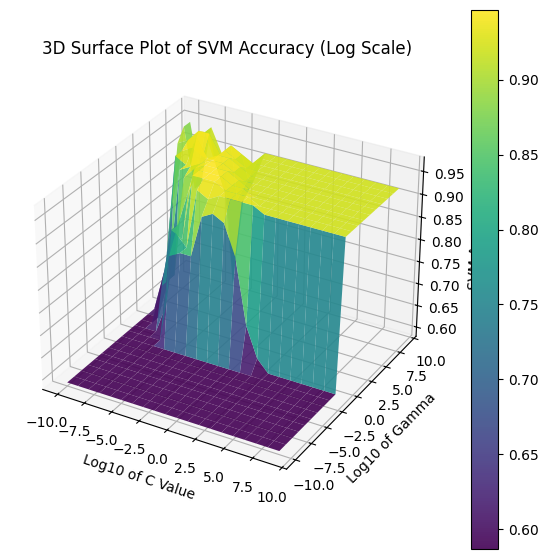

In [732]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize parameters for SVM
C_list = [10**i for i in range(-10, 10, 1)]  # Example values for C
gamma_list = [10**i for i in range(-10, 10, 1)]  # Example values for gamma
results = []

# Loop through C and gamma
for C in C_list:
    for gamma in gamma_list:
        svm_model = SVC(C=C, gamma=gamma, random_state=42)
        svm_model.fit(X_train, y_train)
        svm_predictions = svm_model.predict(X_test)
        svm_accuracy = accuracy_score(y_test, svm_predictions)
        results.append((C, gamma, svm_accuracy))

# Find the highest accuracy and corresponding parameters
print(results)
highest_accuracy = max(results, key=lambda x: x[2])[2]
highest_results = [result for result in results if result[2] == highest_accuracy]

# List all highest results and their parameters
for C, gamma, accuracy in highest_results:
    print(f"Highest Accuracy: {accuracy:.4f} with C: {C} and gamma: {gamma}")

# Prepare data for 3D surface plot
C_values = [result[0] for result in results]
gamma_values = [result[1] for result in results]
accuracy_values = [result[2] for result in results]

# Create a grid for surface plot
X_grid, Y_grid = np.meshgrid(np.unique(C_values), np.unique(gamma_values))
Z_grid = np.array(accuracy_values).reshape(len(np.unique(gamma_values)), len(np.unique(C_values)))

# Plot the surface for SVM using logarithmic scale
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
surf_svm = ax.plot_surface(np.log10(X_grid), np.log10(Y_grid), Z_grid, cmap='viridis', alpha=0.9)

ax.set_xlabel('Log10 of C Value')
ax.set_ylabel('Log10 of Gamma')
ax.set_zlabel('SVM Accuracy')
ax.set_title('3D Surface Plot of SVM Accuracy (Log Scale)')
fig.colorbar(surf_svm)

plt.show()

# Decision Tree v.s XGBoost v.s SVM

/home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:08:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


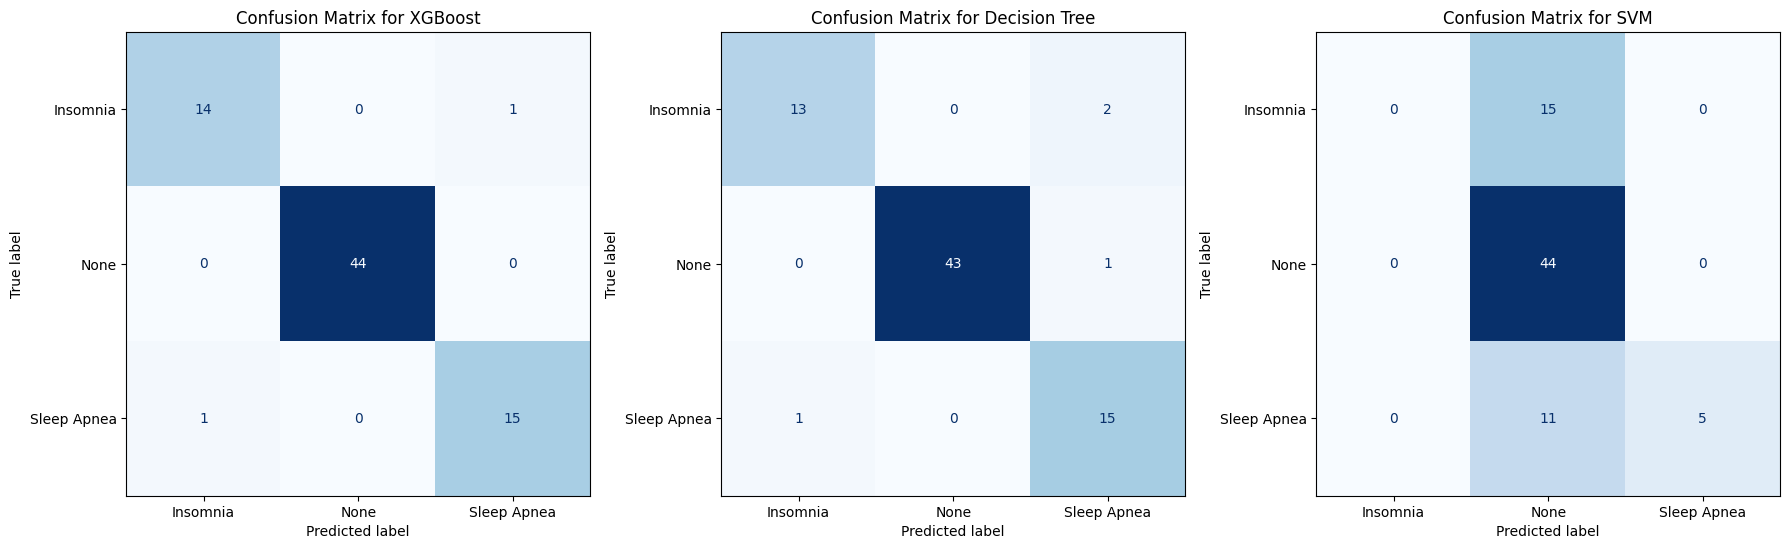

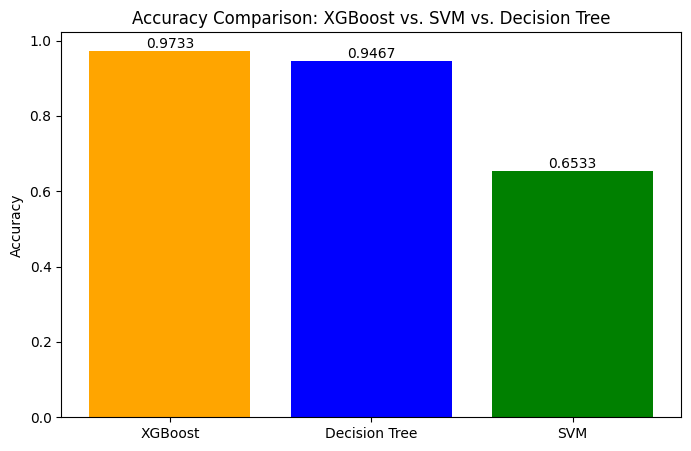

XGBoost Accuracy: 0.9733
Decision Tree Accuracy: 0.9467
SVM Accuracy: 0.6533


In [735]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Feature Engineering: Add interaction terms
# poly = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)
# X_poly = poly.fit_transform(X)

# # Perform PCA for dimensionality reduction
# pca = PCA(n_components=3)  # Adjust number of components as needed
# X_pca = pca.fit_transform(X_poly)

# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42, n_estimators=20, max_depth=4)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, model_name, predictions in zip(
    axes,
    ["XGBoost", "Decision Tree", "SVM"],
    [xgb_predictions,  dt_predictions, svm_predictions]
):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(label_encoders["Sleep Disorder"].inverse_transform(y)))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

# Accuracy Comparison Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(['XGBoost', 'Decision Tree', 'SVM'], [xgb_accuracy, dt_accuracy, svm_accuracy],color=['orange', 'blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: XGBoost vs. SVM vs. Decision Tree')

# Show accuracy values on top of the bars
for i, accuracy in enumerate([xgb_accuracy, dt_accuracy, svm_accuracy]):
    plt.text(i, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Polynominal Features + PCA 

(374, 298)
[[1.00000e+00 2.70000e+01 9.00000e+00 ... 2.68422e+07 8.05266e+05
  4.39236e+07]
 [1.00000e+00 2.80000e+01 1.00000e+00 ... 6.00000e+07 7.50000e+05
  1.00000e+08]
 [1.00000e+00 2.80000e+01 1.00000e+00 ... 6.00000e+07 7.50000e+05
  1.00000e+08]
 ...
 [0.00000e+00 5.90000e+01 5.00000e+00 ... 4.52200e+07 9.04400e+05
  9.31000e+07]
 [0.00000e+00 5.90000e+01 5.00000e+00 ... 4.52200e+07 9.04400e+05
  9.31000e+07]
 [0.00000e+00 5.90000e+01 5.00000e+00 ... 4.52200e+07 9.04400e+05
  9.31000e+07]]


/home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:12:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


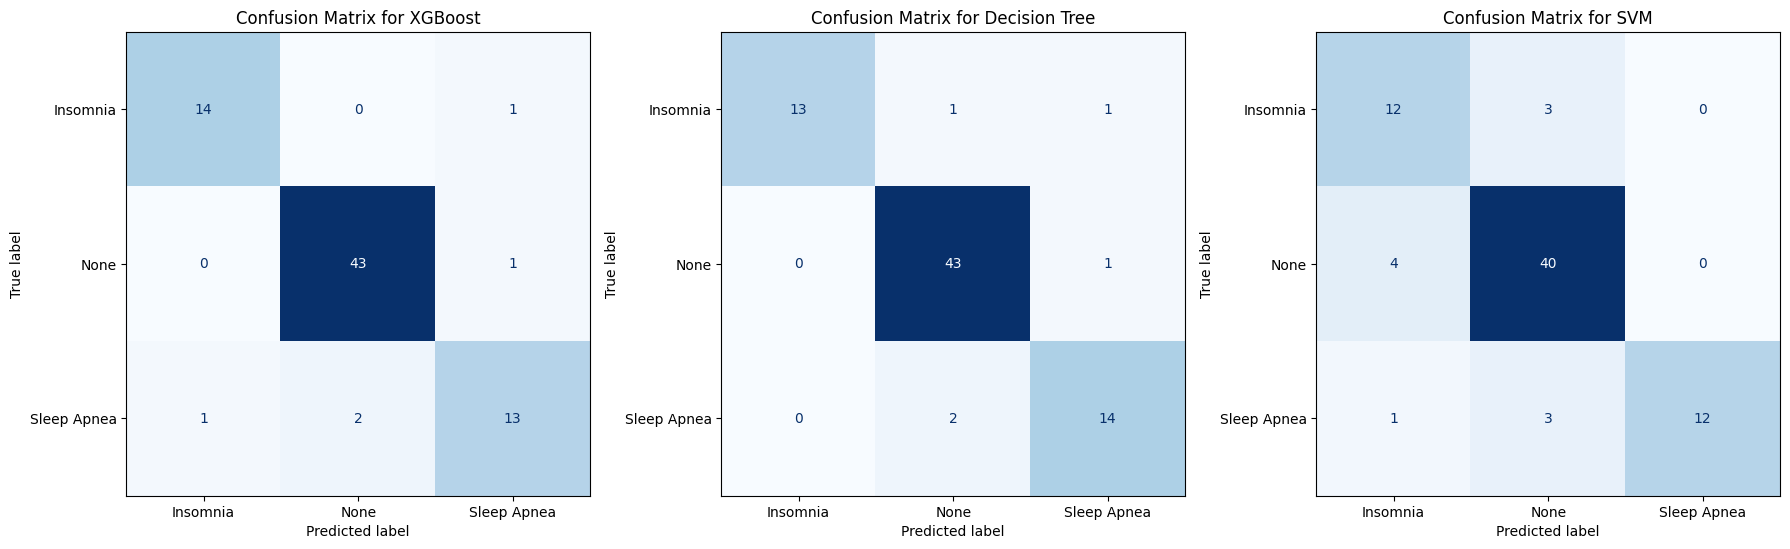

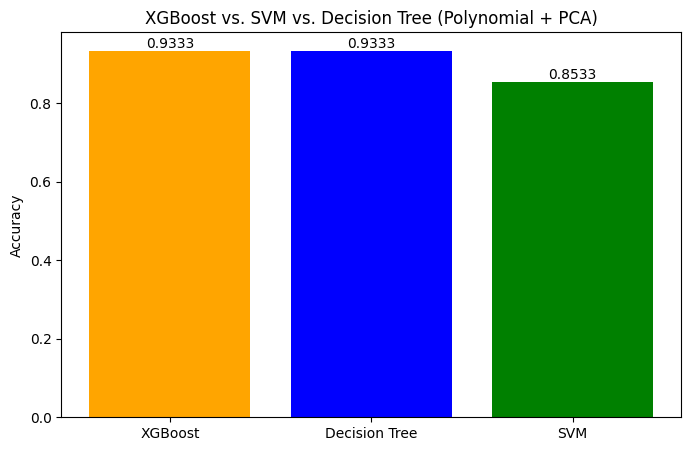

XGBoost Accuracy: 0.9333
Decision Tree Accuracy: 0.9333
SVM Accuracy: 0.8533


In [747]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Feature Engineering: Add interaction terms
poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
print(X_poly.shape)
print(X_poly)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=7)  # Adjust number of components as needed
X_pca = pca.fit_transform(X_poly)

# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42, n_estimators=20, max_depth=4)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, model_name, predictions in zip(
    axes,
    ["XGBoost", "Decision Tree", "SVM"],
    [xgb_predictions,  dt_predictions, svm_predictions]
):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(label_encoders["Sleep Disorder"].inverse_transform(y)))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

# Accuracy Comparison Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(['XGBoost', 'Decision Tree', 'SVM'], [xgb_accuracy, dt_accuracy, svm_accuracy],color=['orange', 'blue', 'green'])
plt.ylabel('Accuracy')
plt.title('XGBoost vs. SVM vs. Decision Tree (Polynomial + PCA)')

# Show accuracy values on top of the bars
for i, accuracy in enumerate([xgb_accuracy, dt_accuracy, svm_accuracy]):
    plt.text(i, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")